##**Part I**

##A.Hierarchical Clustering and Density-Based Spatial Clustering (DBSCAN)

Hierarchical clustering is a connectivity-based clustering model that groups the data points together that are close to each other based on the measure of similarity or distance. The assumption is that data points that are close to each other are more similar or related than data points that are farther apart.

##Types of Hierarcnical Clustering
1. Agglomerative Clustering
2. Divisive clustering

##Hierarchical Agglomerative Clustering
It is also known as the bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data. There is an example of this method.

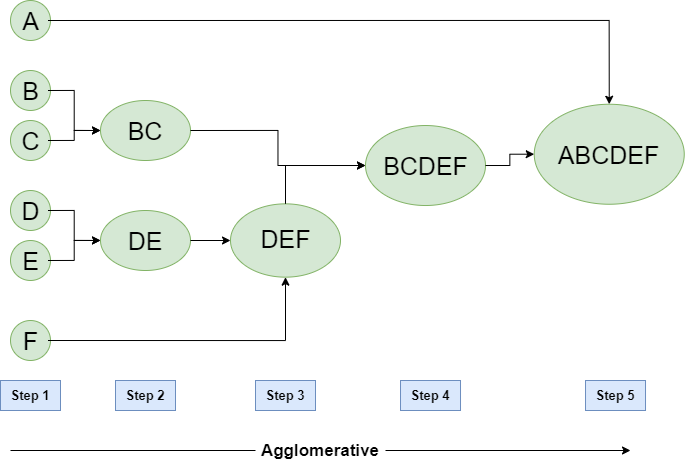

Source: www.geeksforgeeks.org

##Explanation
Consider each alphabet as a single cluster and calculate the distance of one cluster from all the other clusters.

In the second step, comparable clusters are merged together to form a single cluster. Let’s say cluster (B) and cluster (C) are very similar to each other therefore we merge them in the second step similarly to cluster (D) and (E) and at last, we get the clusters [(A), (BC), (DE), (F)]

We recalculate the proximity according to the algorithm and merge the two nearest clusters([(DE), (F)]) together to form new clusters as [(A), (BC), (DEF)]

Repeating the same process; The clusters DEF and BC are comparable and merged together to form a new cluster. We’re now left with clusters [(A), (BCDEF)].

At last, the two remaining clusters are merged together to form a single cluster [(ABCDEF)].

##Hierarchical Divisive clustering
The idea is to start with a cluster that contains the whole data and splitting it and proceeds by splitting clusters recursively until individual data have been split into singleton clusters. It's just the reverse process of the other method


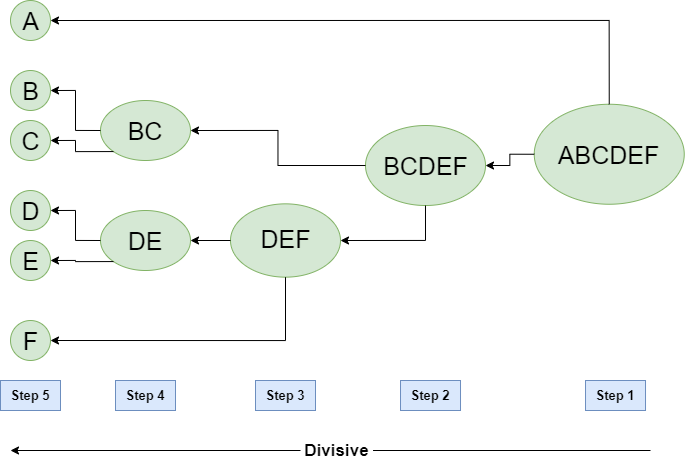

Source: www.geeksforgeeks.org

#Mathematic behind hierarchical clustering
As you could see in the examples for this algorithm we need a distance function that calculates the distance between itemss and a function for calculating the distance between two clusters considering distance function.

##Distance function
There are many ways to describe a distance function. We should choose the distance function based on the information that we have about the dataset or the properties of clusters that we want. There are some of the distance functions.



- 'euclidean': Usual square distance between the two vectors.

- 'maximum':	Maximum distance between two components of x and y.

- 'manhattan':	Absolute distance between the two vectors.

- 'canberra': ∑(|xi−yi|/|xi+yi|).

##Define Cluster Distance
we defined our distance function. Now there are some methods to describe the cluster Distances. One of these methods is linkage function. Some of the linkage functions are:

- Single:	f = min(d(x,y)) (It calculates the min distance between two items of two clusters.)
- Complete: f = max(d(x,y)) (It calculates the max distance between two items of two clusters.)
- Average:  f=average(d(x,y)) (It calculates the average distance between two items of two clusters.)

Main sources:
- www.geeksforgeeks.org
- www.online.stat.psu.edu

##Density-Based Spatial Clustering (DBSCAN)

Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

##Parameters Required For DBSCAN Algorithm
- eps: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered as an outlier. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.


- MinPts: Minimum number of neighbors (data points) within eps radius. The larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

By this parameters we have 3 kind of points:
- Core Point: A point is a core point if it has more than MinPts points within eps.
- Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.
- Noise or outlier: A point which is not a core point or border point.

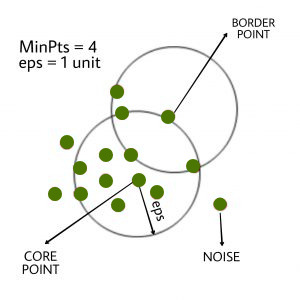

Source: www.geeksforgeeks.org

Steps Used In DBSCAN Algorithm
1. Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
2. For each core point if it is not already assigned to a cluster, create a new cluster.
3. Find recursively all its density-connected points and assign them to the same cluster as the core point.
A point a and b are said to be density connected if there exists a point c which has a sufficient number of points in its neighbors and both points a and b are within the eps distance. This is a chaining process. So, if b is a neighbor of c, c is a neighbor of d, and d is a neighbor of e, which in turn is  neighbor of a implying that b is a neighbor of a.
4. Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

##Example

I used an example provided in www.towardsdatascience.com. It uses a small dataset to provide an easy example. as you can see the dataset is shown below and by just watching it you can understand there are two clusters there

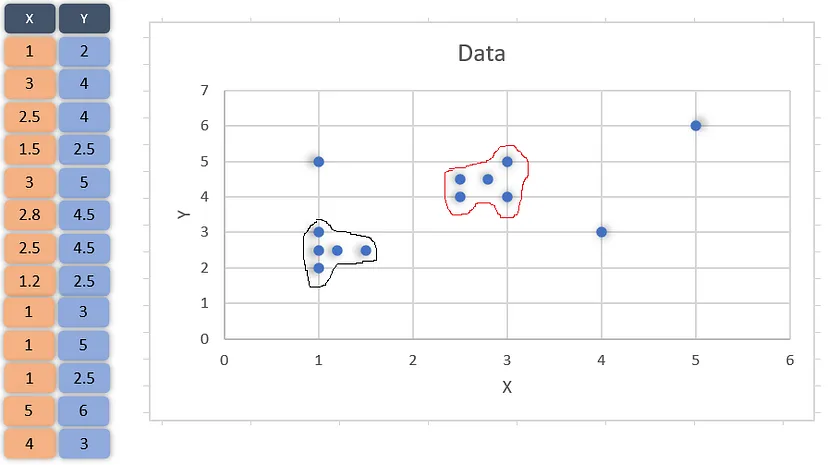

Source: www.towardsdatascience.com

So as we explained,  we want to find the nearest neighbours of each point which at most the distance between them is eps.

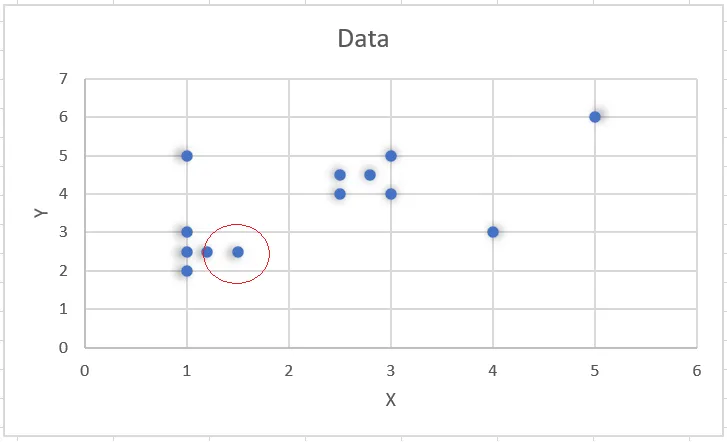

Source: www.towardsdatascience.com

When we find the nearest neighbours by above explanation, we found the type of each point by the defenition we talked about.

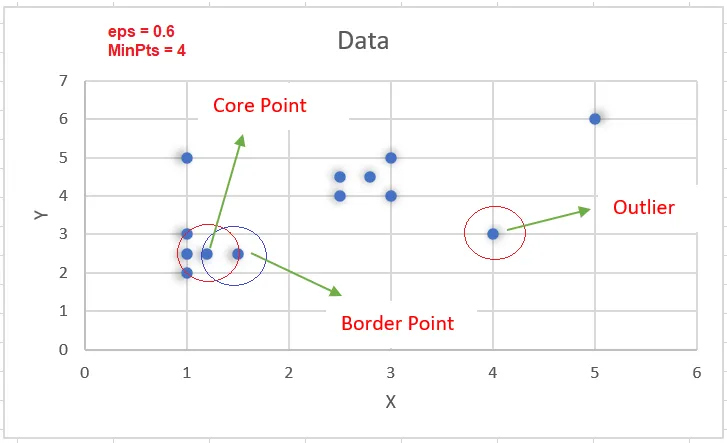

Source: www.towardsdatascience.com

So we set the parameters of DBSCAN as following:
- eps = 0.6
- MinPts = 4

So we start from one point and calculate its distance from all other points then we do it for the next till the end

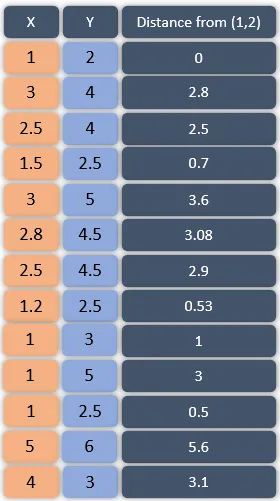

Source: www.towardsdatascience.com

The next image shows each point neigbours so we can findout what is the type of each point. Then we start adding the clusters and its neighbors to a cluster and the neigbours of a Border point to the Border points cluster and goes on. (This explanation is for two next images)

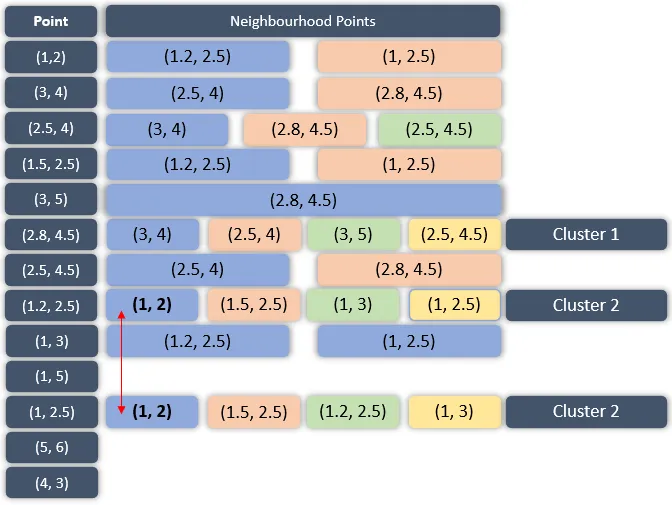

Source: www.towardsdatascience.com

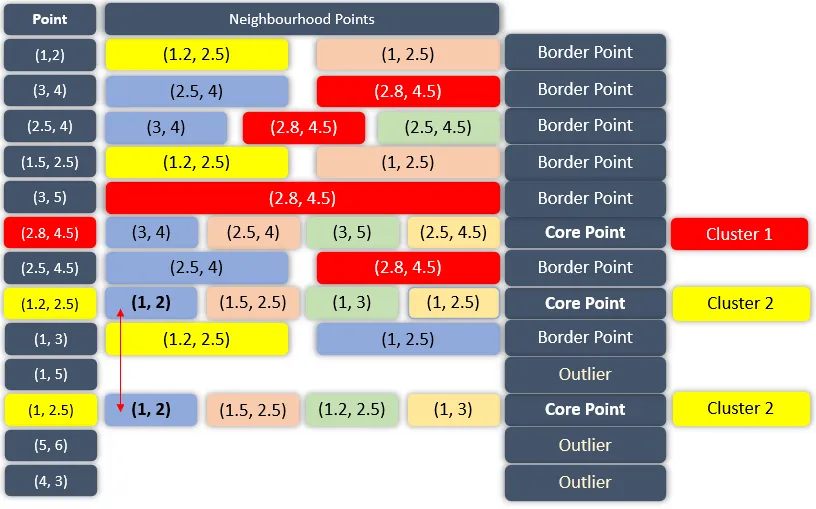

Source: www.towardsdatascience.com

So at the end our clusters are like that and we have outliers which are considered as noise.

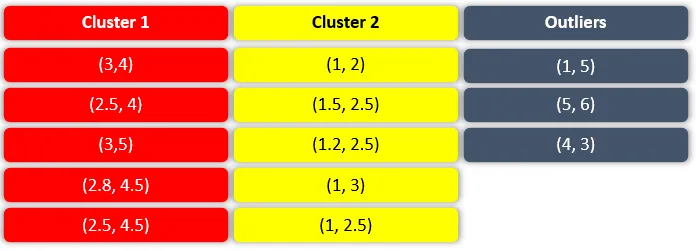

Source: www.towardsdatascience.com

##**B.Build unsupervised models using K-Means, Hierarchical Clustering, and DBSCAN**

Using KMeans algorithm

Mount my drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing some libararies

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Loading data

In [ ]:
data_path="/content/drive/My Drive/810101540_Amir_NaddafFahmideh_P2/UnSup-Data-2024.xlsx"
data = pd.read_excel(data_path, engine='openpyxl')

Checking the data

In [ ]:
data.head()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


Copy and prepare data

In [ ]:
X = data.copy("deep")
X = X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


Check if data has any null values

In [ ]:
print('Null Values =',X.isnull().values.any())

Null Values = False


Finding the best number of clusters by using KMeans with 2 to 40 clusters and check its SSE to find best number of clustering.

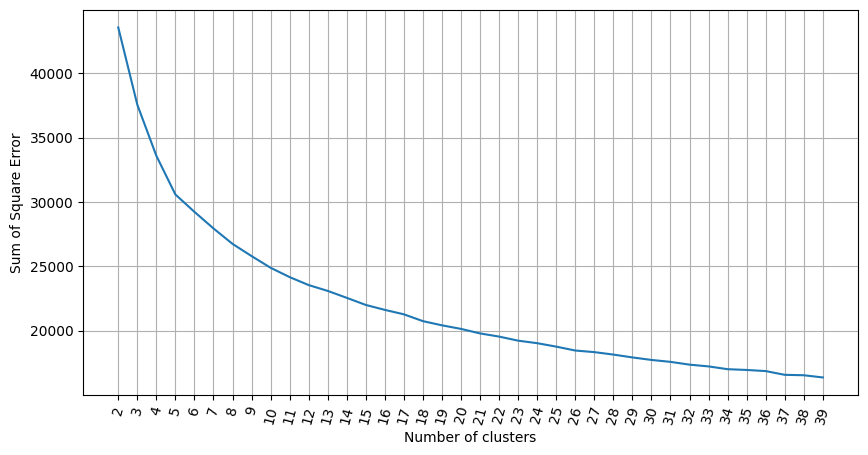

In [ ]:
import warnings
warnings.filterwarnings('ignore')

distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)

By looking the plot we can see the best number of clusters is around 5. In this block we use sillhoute value to check which one is the best.

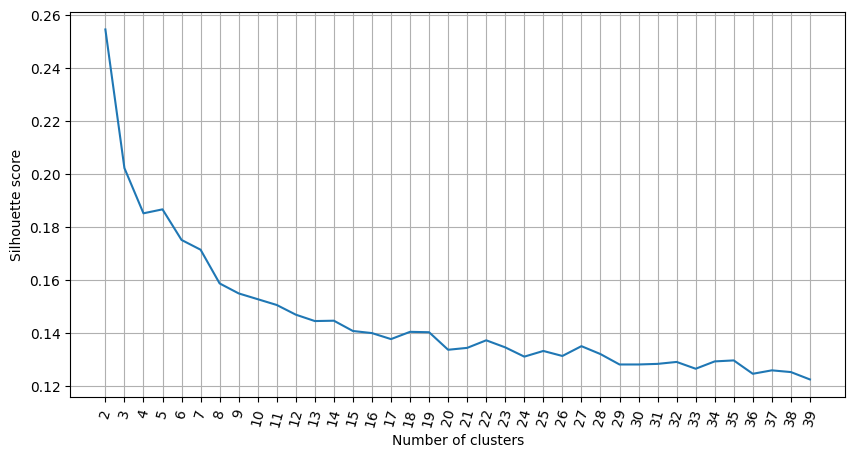

In [ ]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X)
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid(True)


We can make conclusion from upper plot that 5 clusters is the best number of clusters for KMeans algorithm but the sillhouete score is around 0.19 and it seems it's not the best algorithm for clustering this dataset

Lets use Hierarchical Clustering.
From KMeans algorithm we understand that 5 clusters is a good number for clustering this dataset so we use different linkage functions that we talked about in part A and see its results.

In [ ]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

for linkage_function in ( "single", "complete", "average"):
    clustering = AgglomerativeClustering(linkage=linkage_function, n_clusters=5)
    clustering.fit(X)
    labels = clustering.labels_
    sc = metrics.silhouette_score(X, labels)
    print(f"Silhouette Coefficient for {linkage_function} is:%0.2f" % sc)

Silhouette Coefficient for single is:0.07
Silhouette Coefficient for complete is:0.14
Silhouette Coefficient for average is:0.19


Lets use DBSCAN

So at first we use KNN method to find the best eps

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

Now we plot the sorted distances and see where does the plot increase rapidly

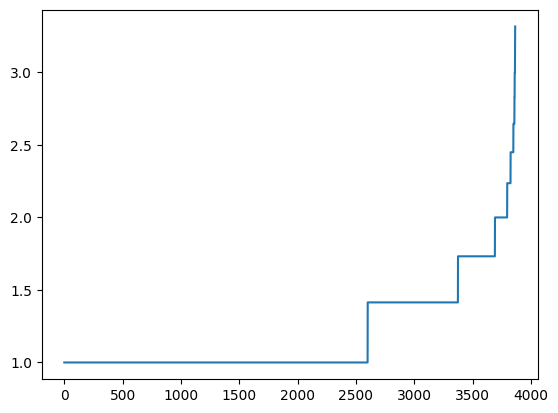

In [ ]:
import numpy as np

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In this plot as you can see the best eps is arount 1.75 to 2. We will use both and calculate the sillhouete score to find the best one.
We also know that the best value of minPts is two times of the number of features.(24)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

my_eps = [1.75,2]
for e in my_eps:
  db = DBSCAN(eps=e, min_samples=24).fit(X)
  labels = db.labels_
  classes, repeats = np.unique(np.array(labels), return_counts=True)
  print(f"classes are: {classes} and repeats are: {repeats}")
  sc = metrics.silhouette_score(X, labels)
  print(f"Silhouette Coefficient with eps={e}: {sc}")

classes are: [-1  0  1] and repeats are: [1360 1101 1405]
Silhouette Coefficient with eps=1.75: 0.11908807536167933
classes are: [-1  0  1] and repeats are: [ 481 3355   30]
Silhouette Coefficient with eps=2: 0.058069404142848356


So the eps = 1.75 gives us the better result and it devides the dataset to two clusters but it also assumes that the dataset has a lot of noise data.

##**Part II**

##**Mathematical intuition of the Gini Impurity Index:**

Lets say we have a data set D with k classes. The probability of that one sample belongs to class i is called p_i. The gini of this data set is defined as you can see below.

$Gini(D) = 1 - \sum^{k}_{i = 1} p_i^2$

It is simply calculating the probability that when we pick 2 samples, they belong to different classes.

$Gini_A(D)$ is defined as:

$Gini_{A}(D) = \frac{n_{1}}{n} \times Gini(D_{1}) + \frac{n{2}}{n} \times Gini(D_{2})$

- n: number of samples
- D1, D2: subsets which are made by using attribute A to split the node
- n1, n2: number of samples that belong to each subset


 In building decision tree we use an attribute that provides the smallest $Gini_A(D)$ so we can split the node. It means the subsets that after splitting by this attribute are more different than the subsets which other attributes would make if we split by them.

Example:

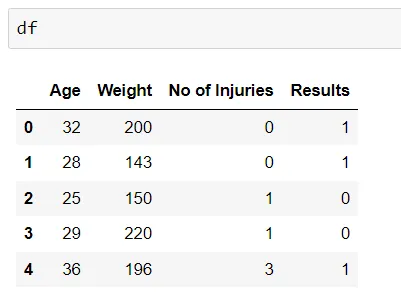

Sourc: www.medium.com

Age is deviding the dataset based on higher or lower than 30.

Weight is deviding the dataset based on higher or lower than 190.

No of Injuries is deviding the dataset based on higher or lower than 0.5.

$Gini_{Age}(D) = \frac{2}{5} \times (1 - 0^2 - 1^2) + \frac{3}{5} \times (1 - (\frac{2}{3})^2 - (\frac{1}{3})^2) = \frac{4}{15} = 0.267$

$Gini_{Weight}(D) = \frac{2}{5} \times (1 - (\frac{1}{2})^2 - (\frac{1}{2})^2) + \frac{3}{5} \times (1  - (\frac{1}{3})^2 - (\frac{2}{3})^2) = \frac{7}{15} = 0.467$

$Gini_{Injury}(D) = \frac{2}{5} \times (1 - 0^2 - 1^2) + \frac{3}{5} \times (1 - (\frac{2}{3})^2 - (\frac{1}{3})^2) = \frac{4}{15} = 0.267$

So we can use Age or No of Injuries to split the root and then we do the same thing for each node untill we reach pure nodes (It means all samples of the node data set is from one class) or we use all our attributes. We will check our calculations by following code. (I scaled the data such that the 1 represent higher than the value I mentioned before and 0 less than the value I mentioned before.

Import libararies

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Make dataset

In [ ]:
attribute_names =  ['Age', 'Weight','No_of_Injuries']
class_name = 'Result'
data1 ={
    'Age' : [1, 0, 0, 0, 1],
    'Weight' : [1, 0, 0, 1, 1],
    'No_of_Injuries' : [0, 0, 1, 1, 1],
    'Result' : [1, 1, 0, 0, 1]
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

   Age  Weight  No_of_Injuries  Result
0    1       1               0       1
1    0       0               0       1
2    0       0               1       0
3    0       1               1       0
4    1       1               1       1


Calculating Gini(D)

In [ ]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

Now we calculate $Gini_A(D)$

In [ ]:
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

Now we calculate Gini for each attribute.

In [ ]:
gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

Gini for Age is 0.267
Gini for Weight is 0.467
Gini for No_of_Injuries is 0.267


##B.Provide an example showing that using entropy tends to produce somewhat more balanced trees than the Gini Impurity Index.

Import some libararies

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

making a dataset

In [ ]:
X, y = make_classification(
    n_samples=500,
    n_features=20,
    n_informative=5,
    n_redundant=2,
    random_state=42
)

Build a decision tree using entropy.

In [ ]:
tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_entropy.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Plot tree_entropy tree

[Text(0.3793604651162791, 0.9583333333333334, 'x[4] <= -0.5\nentropy = 1.0\nsamples = 500\nvalue = [252, 248]'),
 Text(0.10465116279069768, 0.875, 'x[9] <= -3.124\nentropy = 0.416\nsamples = 131\nvalue = [11, 120]'),
 Text(0.046511627906976744, 0.7916666666666666, 'x[4] <= -1.973\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.023255813953488372, 0.7083333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06976744186046512, 0.7083333333333334, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.16279069767441862, 0.7916666666666666, 'x[10] <= 2.165\nentropy = 0.245\nsamples = 123\nvalue = [5, 118]'),
 Text(0.11627906976744186, 0.7083333333333334, 'x[15] <= -1.506\nentropy = 0.073\nsamples = 113\nvalue = [1, 112]'),
 Text(0.09302325581395349, 0.625, 'x[13] <= -0.802\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.06976744186046512, 0.5416666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11627906976744186, 0.5416666666666666, 'entrop

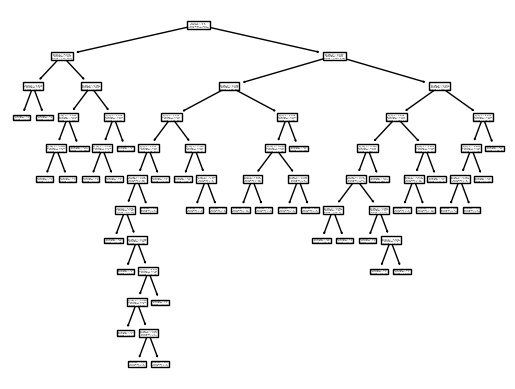

In [ ]:
plot_tree(tree_entropy)

Building a decision tree using gini index.

In [ ]:
tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X, y)

DecisionTreeClassifier()

Plot gini tree

[Text(0.4264705882352941, 0.9444444444444444, 'x[4] <= 0.394\ngini = 0.5\nsamples = 500\nvalue = [252, 248]'),
 Text(0.11029411764705882, 0.8333333333333334, 'x[9] <= -2.84\ngini = 0.348\nsamples = 227\nvalue = [51, 176]'),
 Text(0.0392156862745098, 0.7222222222222222, 'x[4] <= -1.572\ngini = 0.33\nsamples = 24\nvalue = [19, 5]'),
 Text(0.0196078431372549, 0.6111111111111112, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.058823529411764705, 0.6111111111111112, 'x[8] <= 0.378\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.0392156862745098, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0784313725490196, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.18137254901960784, 0.7222222222222222, 'x[4] <= -1.058\ngini = 0.266\nsamples = 203\nvalue = [32, 171]'),
 Text(0.16176470588235295, 0.6111111111111112, 'gini = 0.0\nsamples = 92\nvalue = [0, 92]'),
 Text(0.20098039215686275, 0.6111111111111112, 'x[10] <= -0.354\ngini = 0.41\nsamples = 111\nvalue = [32, 7

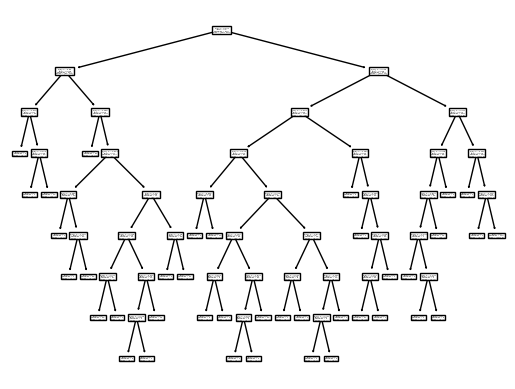

In [ ]:
plot_tree(tree_gini)

As you can see the leaves of tree in entropy tree are in the same levels but in gini index tree the leaves are in different levels and it just shows that using entropy tends to build a more balanced tree than gini impurity index.

##C. build a Decision Tree and Random Forest Models

Add some libararies

In [8]:
import gdown
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

Load dataset

In [4]:
data_path = "/content/drive/MyDrive/810101540_Amir_NaddafFahmideh_P2/Assignment-1-Dataset.csv"
data = pd.read_csv(data_path)
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
count,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,1.113040e+05,111304.000000,...,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,0.0,0.0
mean,1.384011,16.234637,1.141181,109.371424,1.678242,4.501159,0.116312,0.031535,3.779658e+06,38.706920,...,32.613482,63.606753,4096.888638,1.325262,13.327666,32.536432,1.247233,0.811660,NaN,NaN
std,0.486584,13.833192,1.729046,119.132927,0.467153,1.828697,1.364295,0.574920,2.086547e+08,47.314877,...,25.041610,2.130230,2210.531994,1.848414,8.912911,25.294460,0.971636,0.896797,NaN,NaN
min,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,...,0.000000,61.000000,1403.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,1.000000,6.000000,0.000000,26.000000,1.000000,4.000000,0.000000,0.000000,0.000000e+00,10.000000,...,24.000000,61.000000,1416.000000,0.000000,0.000000,23.000000,1.000000,0.000000,NaN,NaN
50%,1.000000,7.000000,0.000000,50.000000,2.000000,4.000000,0.000000,0.000000,0.000000e+00,22.000000,...,36.000000,63.000000,3454.000000,0.000000,18.000000,36.000000,1.000000,0.000000,NaN,NaN
75%,2.000000,27.000000,2.000000,170.000000,2.000000,6.000000,0.000000,0.000000,0.000000e+00,48.000000,...,36.000000,66.000000,6444.000000,4.000000,18.000000,36.000000,1.000000,2.000000,NaN,NaN
max,4.000000,44.000000,6.000000,932.000000,2.000000,8.000000,88.000000,50.000000,3.889600e+10,332.000000,...,300.000000,70.000000,9960.000000,7.000000,36.000000,300.000000,87.000000,2.000000,NaN,NaN


Prepare data and split it to train and test data

In [5]:
X = data.drop('Target', axis = 1)
X = X.drop('Unnamed: 93', axis = 1)
X = X.drop('Unnamed: 94', axis = 1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build a decision tree and train and test it

In [6]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train,y_train)

y_pred = DT.predict(X_test)

Get a report of the test on tree

In [9]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     11504
           1       0.62      0.63      0.62      3581
           2       0.63      0.62      0.63      7176

    accuracy                           0.67     22261
   macro avg       0.65      0.65      0.65     22261
weighted avg       0.67      0.67      0.67     22261



Lets make a random forest model

Import some libararies

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

Build our random forest model and train and test the model

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

See the result of the Random forest test

In [12]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     11504
           1       0.67      0.66      0.66      3581
           2       0.69      0.61      0.65      7176

    accuracy                           0.70     22261
   macro avg       0.70      0.68      0.69     22261
weighted avg       0.70      0.70      0.70     22261



As we expected the random forest tree has better result because it prevents overfitting and it works better in high dementional data.

##D. Decision tree algorithm for solving regression problems


We use MSE (mean square error) to build a Decision Tree for solving regression problems. The algorithm is explained below by an example:


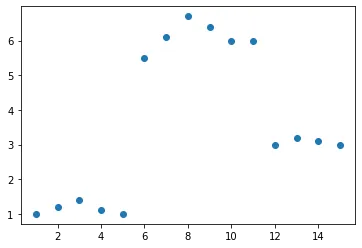

Source:www.medium.com

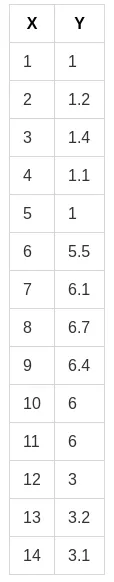

Source: www.medium.com

Steps:
- The first step is to sort the data based on X ( In this case, it is already sorted ). Then, take the average of the first 2 rows in variable X ( which is (1+2)/2 = 1.5 according to the given dataset ). Divide the dataset into 2 parts ( Part A and Part B ) , separated by x < 1.5 and X ≥ 1.5.
Now, Part A consist only of one point, which is the first row (1,1) and all the other points are in Part — B. Now, take the average of all the Y values in Part A and average of all Y values in Part B separately. These 2 values are the predicted output of the decision tree for x < 1.5 and x ≥ 1.5 respectively. Using the predicted and original values, calculate the mean square error and note it down.

- In step 1, we calculated the average for the first 2 numbers of sorted X and split the dataset based on that and calculated the predictions. Then, we do the same process again but this time, we calculate the average for the second 2 numbers of sorted X ( (2+3)/2 = 2.5 ). Then, we split the dataset again based on X < 2.5 and X ≥ 2.5 into Part A and Part B again and predict outputs, find mean square error as shown in step 1. This process is repeated for the third 2 numbers, the fourth 2 numbers, the 5th, 6th, 7th till n-1th 2 numbers ( where n is the number of records or rows in the dataset ).

- Now that we have n-1 mean squared errors calculated , we need to choose the point at which we are going to split the dataset. and that point is the point, which resulted in the lowest mean squared error on splitting at it. In this case, the point is x=5.5. Hence the tree will be split into 2 parts. x<5.5 and x≥ 5.5. The Root node is selected this way and the data points that go towards the left child and right child of the root node are further recursively exposed to the same algorithm for further splitting.

The basic idea behind the algorithm is to find the point in the independent variable to split the data-set into 2 parts, so that the mean squared error is the minimised at that point. The algorithm does this in a repetitive fashion and forms a tree-like structure.

The decision tree and the result would be like below

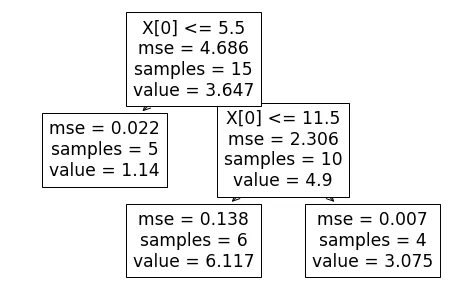

Source: www.medium.com

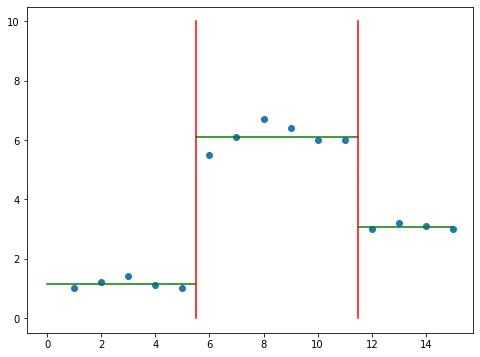

Source: www.medium.com

Import libararies

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Load dataset

In [1]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_valid, y_valid) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


Check the dataset

In [16]:
print(f"Train data: {X_train.shape}, Train targets: {y_train.shape}")

Train data: (404, 13), Train targets: (404,)


Training the decision tree model

In [17]:
tree_regr = DecisionTreeRegressor()
tree_regr = tree_regr.fit(X_train, y_train)

Training the random forest model

In [15]:
Forest_regr = RandomForestRegressor()
Forest_regr = Forest_regr.fit(X_train, y_train)

evaluate the models by MSE

In [23]:
y_dt_pre = tree_regr.predict(X_valid)
y_rf_pre = Forest_regr.predict(X_valid)
dt_mse = mean_squared_error(y_valid, y_dt_pre)
rf_mse = mean_squared_error(y_valid, y_rf_pre)

print(f"Decision tree regressor MSE is {dt_mse}")
print(f"Random Forest regressor MSE is {rf_mse}")

Decision tree regressor MSE is 22.964117647058824
Random Forest regressor MSE is 13.789401931372542


As you can see the MSE of Random Forest model is better because its MSE is lower.

##**Part III**

##A.mathematical intuition for Basis Encoding and Amplitude Encoding

Basis Encoding:

At first we should transform our input into binary bits ($X_i$). Then we will use following equation to preproccess our data for our quantom model.

$∣D⟩ = \frac{1}{\sqrt{M}} \sum_{i=1}^{M} ∣X_i⟩$


For example for this dataset that has 3 numbers 4, 6, 2, we first make these numbers binary 100, 110, 010. The datset is represented in superpositions of computational basis states as:

$∣D⟩ = \frac{1}{\sqrt{3}} (|100⟩ +  |110⟩ +|010⟩ )$

Amplitude Encoding:

It encodes data into the amplitudes of a quantum state. We first normalize the data so the sum of square of our amplitudes be equal to 1. For this we devide all of our dataset into the norm of it. The norm is calculates by following equation. (X is our dataset)

$ ||X|| =  \sqrt{\sum_{i=1}^{N} |x_i|^2}$

Then after deviding the data by norm of X lets say we have normalized dataset $X' = [x'_1, x'_2, ..., x'_n]$. The quantom state that represent this dataset is defined by following equation:

$|\psi\rangle = \sum_{j=1}^{N} x'_j |j⟩$

For example lets say we have x = [3,4]. At first we normalize the dataset. $\sqrt{3^2 + 4^2} = 5$. So the normalized data is $x' = [ 3/5, 4/5]$

Now we map it into 1_qubit quantom state:

$|\psi\rangle = \frac{3}{5} |0⟩ + \frac{4}{5} |1⟩ $

Basis Encoding code example:

Download and import libararies

In [1]:
!pip install qiskit==0.46.0
!pip install pylatexenc
!pip install qiskit-aer
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_state_qsphere
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2631722c8b280cb39a0be46cc3d5259e07b276f64e01a2d8ca59b178a078e93d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━

Make the quantum circuit

In [3]:
data_point = 9
binary_rep = "1001"

num_qubits = len(binary_rep)
qc = QuantumCircuit(num_qubits)
for i, bit in enumerate(binary_rep):
  if bit == '1':
      qc.x(i)

Draw the circiut

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


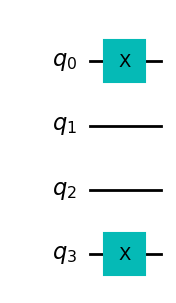

In [4]:
qc.draw('mpl')

Amplitude Encoding code example:

I used the same example data set X and normalized it

In [10]:
X = [3, 4]

norm = np.linalg.norm(X)
X_n = X / norm
X_n

array([0.6, 0.8])

Then I made a new Quantum circuit (because I made a dataset with just two samples we just need 1 qubit but if we had bigger sample we would use more qubits for it)

In [16]:
qc_amplitude = QuantumCircuit(1)
qc_amplitude.initialize(X_n)

Draw the circuit

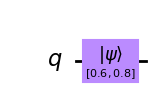

In [17]:
qc_amplitude.draw('mpl')

B.Explain the following Quantum Circuit and use Qiskit to create it.

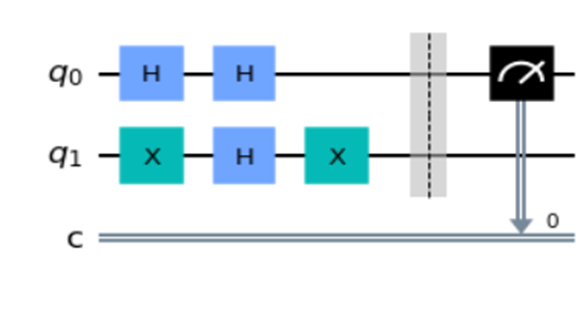

Lets start with creating the circuit. It contains two quantum bits and one classical bit.

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q=QuantumRegister(2)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)

Putting the gates in their places

In [19]:
qc.h(0)
qc.h(0)
qc.x(1)
qc.h(1)
qc.x(1)

Adding barrier and measurment into circuit.

In [21]:
qc.barrier()
qc.measure(0,c)

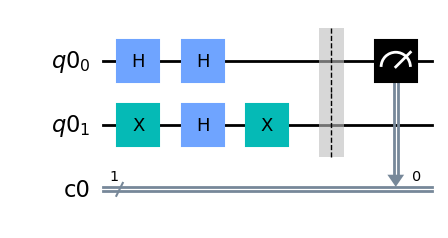

In [22]:
qc.draw('mpl')

So lets see what it does.

For the first qubit we have two H gates so after applying these two gates on the q0 we have the following equations:





$[
H |1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \begin{pmatrix}
1 \\
0
\end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1
\end{pmatrix}
$]

and appling it for the second time:

$[
H |1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \frac{1}{\sqrt{2}} \begin{pmatrix}
1 \\
1
\end{pmatrix} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$ = $|0\rangle]$

For the second qubit we have following equations:

When the X gate is applied to $(|0\rangle$):

$[
X |0\rangle = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} \begin{pmatrix}
1 \\
0
\end{pmatrix} = \begin{pmatrix}
0 \\
1
\end{pmatrix} = |1\rangle
$]

   When the Hadamard gate is applied to $(|1\rangle$):

   $[
   H |1\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 1 \\
   1 & -1
   \end{pmatrix} \begin{pmatrix}
   0 \\
   1
   \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 \\
   -1
   \end{pmatrix} = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
   $]


   When we apply the X gate again to the state $(\frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$):
   
   $[
   X \left( \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 \\
   -1
   \end{pmatrix} \right) = \frac{1}{\sqrt{2}} \begin{pmatrix}
   0 & 1 \\
   1 & 0
   \end{pmatrix} \begin{pmatrix}
   1 \\
   -1
   \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
   -1 \\
   1
   \end{pmatrix} = \frac{1}{\sqrt{2}} (|1\rangle - |0\rangle)
   $]

Explanation:

for the first qubit when we apply hadamard gate its going to give us a super position that is like $"a|0> + b |1>"$ and after applying the hadamard gate again its going to vanish the last gate effect and stay at $|0>$ .


for the second qubit its going to apply X-gate this result in go from |0> to |1>.
then if we apply the hadamard gate its going to give it a supper position the |1⟩ state into (|0⟩ - |1⟩)/√2 ,
and applying another X-gate is going to invert the superposition

##C.

# **1.Import libraries**

In [1]:
from sklearn import model_selection, datasets
import numpy as np
import copy
import matplotlib.pyplot as plt


# **2.Install qiskit**

In [3]:
!pip install qiskit==0.46.0

  Using cached qiskit-0.46.0-py3-none-any.whl (9.6 kB)
  Using cached qiskit_terra-0.46.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.3 MB)
  Using cached symengine-0.11.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (39.4 MB)
  Attempting uninstall: symengine
    Found existing installation: symengine 0.9.2
    Uninstalling symengine-0.9.2:
      Successfully uninstalled symengine-0.9.2
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.45.0
    Uninstalling qiskit-terra-0.45.0:
      Successfully uninstalled qiskit-terra-0.45.0
  Attempting uninstall: qiskit
    Found existing installation: qiskit 0.45.0
    Uninstalling qiskit-0.45.0:
      Successfully uninstalled qiskit-0.45.0


# **3.Install pylatexenc**

In [4]:
!pip install pylatexenc

# **4.Import libraries for Quantum Machine Learning**

In [5]:
from qiskit import *

from qiskit.visualization import circuit_drawer

#**5.Import the Iris dataset and do  train test split**

In [6]:
iris=datasets.load_iris()
X=iris.data[0:100]
Y=iris.target[0:100]
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=0.20, random_state=42)
print(Y_train)

[1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1
 0 1 1 0 1 1]


In [7]:
print(X_train)

[[5.7 2.8 4.5 1.3]
 [5.6 3.  4.1 1.3]
 [5.  3.4 1.6 0.4]
 [4.4 3.2 1.3 0.2]
 [5.6 2.5 3.9 1.1]
 [5.7 4.4 1.5 0.4]
 [5.  3.5 1.3 0.3]
 [5.7 2.9 4.2 1.3]
 [4.9 3.1 1.5 0.1]
 [6.3 2.5 4.9 1.5]
 [4.8 3.4 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [6.  3.4 4.5 1.6]
 [5.2 3.4 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [5.4 3.9 1.7 0.4]
 [5.6 3.  4.5 1.5]
 [6.7 3.1 4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.4 3.9 1.3 0.4]
 [5.  3.3 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [5.2 3.5 1.5 0.2]
 [5.1 3.8 1.5 0.3]
 [5.5 2.4 3.7 1. ]
 [5.  3.  1.6 0.2]
 [6.  2.2 4.  1. ]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [4.4 2.9 1.4 0.2]
 [6.  2.9 4.5 1.5]
 [4.6 3.4 1.4 0.3]
 [5.6 2.9 3.6 1.3]
 [5.5 3.5 1.3 0.2]
 [5.5 2.5 4.  1.3]
 [6.3 3.3 4.7 1.6]
 [5.7 2.8 4.1 1.3]
 [6.5 2.8 4.6 1.5]
 [5.  3.5 1.6 0.6]
 [7.  3.2 4.7 1.4]
 [5.8 2.7 4.1 1. ]
 [5.1 3.8 1.6 0.2]
 [6.2 2.2 4.5 1.5]
 [5.9 3.  4.2 1.5]
 [6.2 2.9 4.3 1.3]
 [5.7 2.6 3.5 1. ]
 [4.5 2.3 1.3 0.3]
 [6.6 2.9 4.

In [8]:
print(X_train[0])

[5.7 2.8 4.5 1.3]


# **6. N=4 because in the case of Iris dataset, we have four features**

In [9]:
N=4

# **7.Rotate the qubits to encode our classical data. This method enables us to get the classical data into the quantum processor. We rotate the angles by our features.**





/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


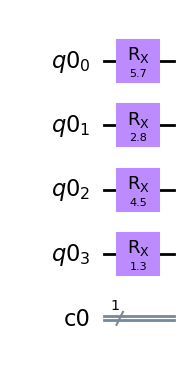

In [10]:
q=QuantumRegister(N)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)

for i, x in enumerate(X_train[0]):
  qc.rx(x,i)

qc.draw('mpl')

# **8.Create a feature map in order to put our data into a quantum processor**

In [11]:
def feature_map(X):
 q=QuantumRegister(N)
 c=ClassicalRegister(1)
 qc=QuantumCircuit(q,c)
 for i, x in enumerate(X):
  qc.rx(x,i)
 return qc, c



# **9.Put the variational circuit between the barriers. This will allow us to have more rotations. Note that in Quantum Machine Learning, angles are trainable parameters and learned. We initially put random rotations i.e[ np.random.rand(N)]. Thus, QML will try to find the right angles(theta) to classify the iris dataset.The blue lines below are called CNOT gates.CNOT gates create entanglement.This will enable the information to move from one qubit to another qubit. In the end, we only measure one qubit**

In [12]:
def variational_circuit (qc,theta):
  for i in range(N-1):
    qc.cnot(i,i+1)

  qc.cnot(N-1,0)
  for i in range(N):
      qc.ry(theta[i],i)
  return qc

# **10.Run our Quantum Circuit on Qasm Simulator. Then we obtain the counts**

In [13]:
pip install qiskit-aer

In [14]:
from qiskit_aer import Aer

<ipython-input-12-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-12-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)
<ipython-input-15-8fd510524f38>:8: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job=execute(qc,backend, shots=shots)


{'1': 61872, '0': 38128}
0.61872


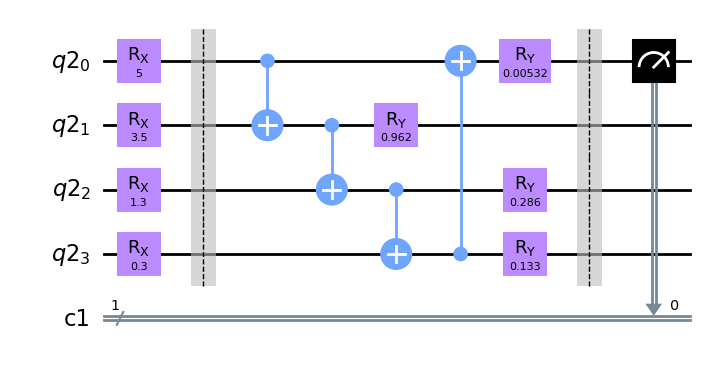

In [15]:
qc,c=feature_map(X_train[6])
qc.barrier()
qc=variational_circuit(qc,np.random.rand(N))
qc.barrier()
qc.measure(0,c)
shots=1E5
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend, shots=shots)
result=job.result()
counts=result.get_counts(qc)
print(counts)
print(counts['1']/shots)
qc.draw('mpl')


# **11.Now, if we print(Y_train[6])(next cell), we get label 0 which is not the same as label 1 when we use the Qasm Simulator.  The reason is that we have not trained our model yet. So, this is before training.**

In [16]:
print(Y_train[6])

0


# **12.Create our Quantum Neural Network**

In [17]:
def quantum_nn(X, theta, simulator =True):
 qc,c=feature_map(X)
 qc=variational_circuit(qc,theta)
 qc.measure(0,c)

 shots=1E5
 backend=Aer.get_backend('qasm_simulator')
 job=execute(qc,backend, shots=shots)
 result=job.result()
 counts=result.get_counts(qc)
 return counts['1']/shots

# **13.Define our loss function**

In [18]:
def loss(prediction, target):
    return(prediction-target)**2

# **14.Define our Gradient**

In [19]:
def gradient(X,Y, theta):
  delta=0.01
  grad=[]
  for i in range(len(theta)):
    dtheta=copy.copy(theta)
    dtheta[i] +=delta
    pred1=quantum_nn(X, dtheta)
    pred2=quantum_nn(X, theta)
    grad.append((loss(pred1, Y)-loss(pred2, Y))/delta)
    return np.array(grad)

# **15.Define our accuracy function**

In [20]:
def accuracy (X,Y, theta):

    counter=0
    for X_i, Y_i in zip(X, Y):
        prediction=quantum_nn(X_i, theta)

        if prediction<0.5 and Y_i==0:
             counter+=1
        elif prediction>=0.5 and Y_i==1:
              counter+=1
    return counter/len(Y)

# **16.Update the variational parameter( theta)**

In [21]:
eta=0.03
loss_list=[]
theta= np.ones(N)

print('Epoch\t Loss\t Training Accuracy')

for i in range(18):
  loss_tmp=[]
  for X_i, Y_i in zip( X_train, Y_train):
    prediction=quantum_nn(X_i, theta)
    loss_tmp.append(loss(prediction,Y_i))
    theta=theta-eta*gradient(X_i, Y_i, theta)

  loss_list.append(np.mean(loss_tmp))
  acc=accuracy(X_train, Y_train, theta)
  print(f'{i} \t {loss_list[-1]:.3f} \t {acc:.3f}')



Epoch	 Loss	 Training Accuracy


<ipython-input-12-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-12-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)
<ipython-input-17-7bc59db681a0>:8: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job=execute(qc,backend, shots=shots)


0 	 0.277 	 0.200
1 	 0.265 	 0.225
2 	 0.256 	 0.188
3 	 0.255 	 0.263
4 	 0.250 	 0.787
5 	 0.242 	 0.775
6 	 0.235 	 0.775
7 	 0.229 	 0.800
8 	 0.223 	 0.838
9 	 0.221 	 0.800
10 	 0.217 	 0.838
11 	 0.214 	 0.812
12 	 0.211 	 0.825
13 	 0.210 	 0.825
14 	 0.207 	 0.812
15 	 0.206 	 0.825
16 	 0.206 	 0.812
17 	 0.206 	 0.800


<function matplotlib.pyplot.show(close=None, block=None)>

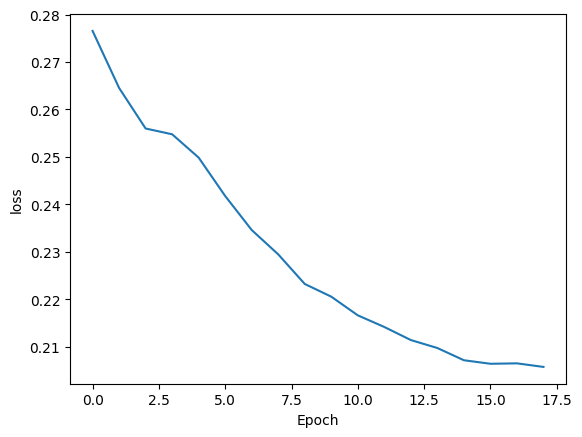

In [22]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show

In [23]:
accuracy(X_test,Y_test,theta)

<ipython-input-12-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-12-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)
<ipython-input-17-7bc59db681a0>:8: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job=execute(qc,backend, shots=shots)


0.8

In [24]:
quantum_nn(X_test[7], theta, simulator=False)

<ipython-input-12-78d5960a0ade>:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(i,i+1)
<ipython-input-12-78d5960a0ade>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.cx as direct replacement.
  qc.cnot(N-1,0)
<ipython-input-17-7bc59db681a0>:8: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job=execute(qc,backend, shots=shots)


0.6225

In [25]:
Y_test[7]

1